In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

In [2]:
# Loading csv to dataframe
df = pd.read_csv("loan_approval_dataset.csv")

# Data Exploration

In [3]:
# Displaying first 5 lines of the dataframe
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
# Displaying last 5 lines of the dataframe
df.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [5]:
# Getting information for each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
# Descriptive Statistics of each column
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
loan_id,4269.0,NaN,NaN,NaN,2135.0,1232.498479,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,NaN,NaN,NaN,2.498712,1.69591,0.0,1.0,3.0,4.0,5.0
education,4269,2,Graduate,2144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
self_employed,4269,2,Yes,2150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income_annum,4269.0,NaN,NaN,NaN,5059123.916608,2806839.831818,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,NaN,NaN,NaN,15133450.456781,9043362.984843,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,NaN,NaN,NaN,10.900445,5.709187,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,NaN,NaN,NaN,599.936051,172.430401,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,NaN,NaN,NaN,7472616.537831,6503636.587664,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,NaN,NaN,NaN,4973155.305692,4388966.089638,0.0,1300000.0,3700000.0,7600000.0,19400000.0


In [7]:
# Percentage of null/missing values for each column
missing_percentages = df.isnull().mean() * 100
missing_percentages

loan_id                      0.0
 no_of_dependents            0.0
 education                   0.0
 self_employed               0.0
 income_annum                0.0
 loan_amount                 0.0
 loan_term                   0.0
 cibil_score                 0.0
 residential_assets_value    0.0
 commercial_assets_value     0.0
 luxury_assets_value         0.0
 bank_asset_value            0.0
 loan_status                 0.0
dtype: float64

In [8]:
# Checking the datatypes of each column
df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [9]:
# Stripping the columns
df.columns = df.columns.str.replace(' ', '')
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

# Data Visualization

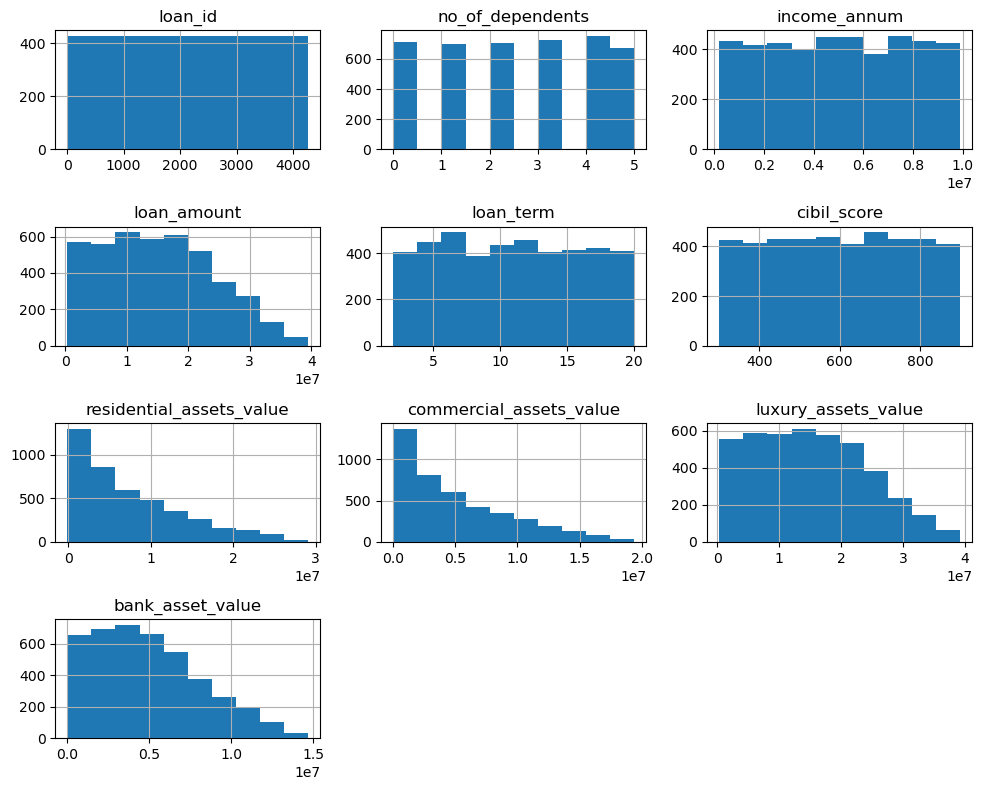

In [10]:
# Displaying all histogram for each of the columns
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

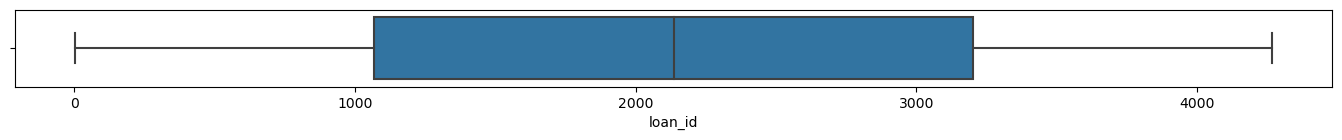

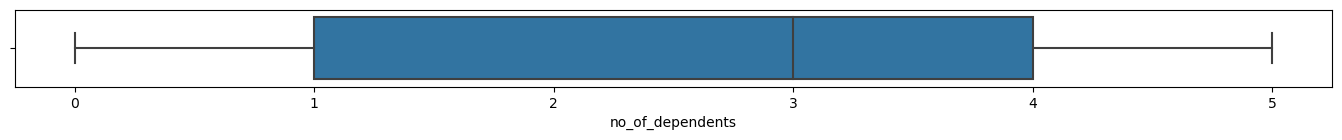

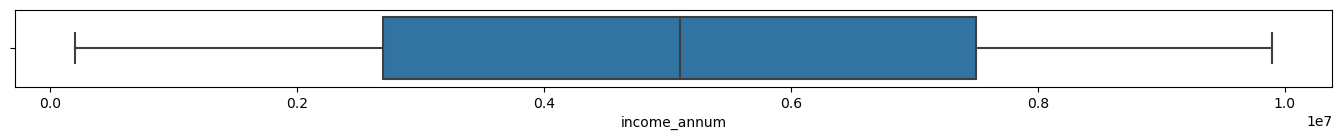

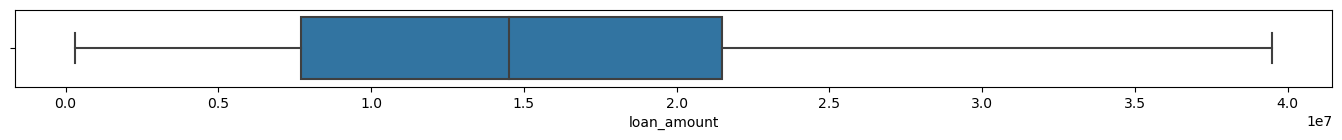

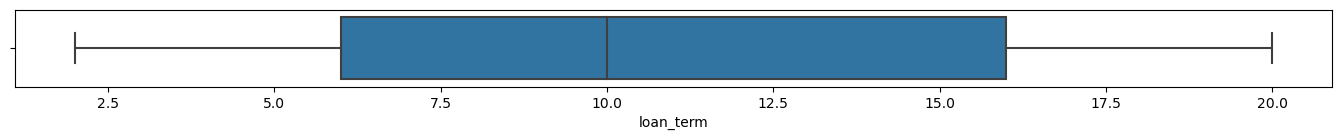

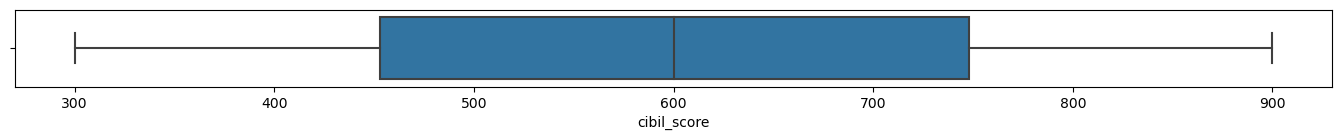

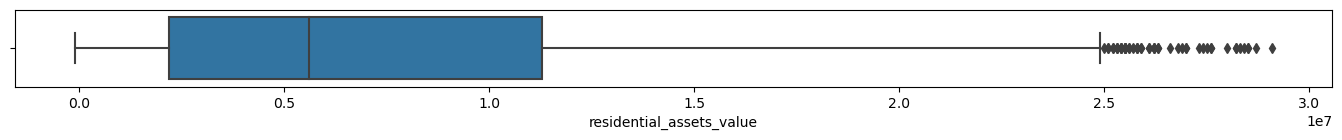

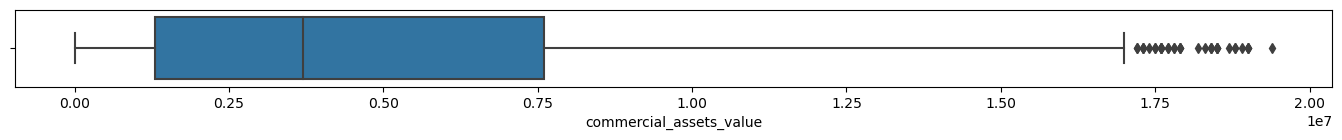

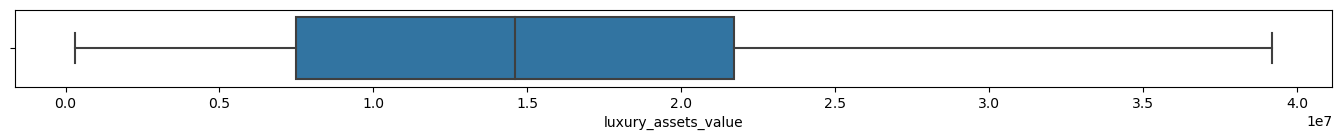

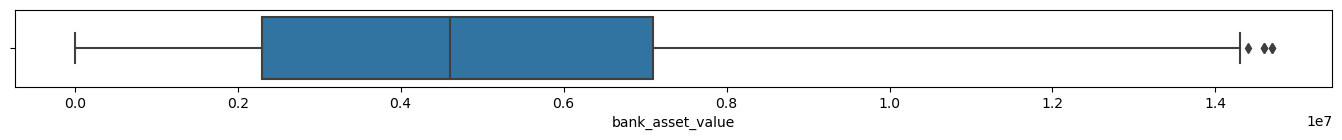

In [11]:
# Displaying all the boxplot for each of the columns
df1=df.select_dtypes(exclude=['object'])

for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df1, x=column)

In [12]:
#Creating a pivot table called pivot_df_count
pivot_df_count = df.pivot_table(index='no_of_dependents', columns='loan_status', aggfunc='size', fill_value=0)
pivot_df_count.head()

loan_status,Approved,Rejected
no_of_dependents,,
0,457,255
1,430,267
2,441,267
3,457,270
4,465,287


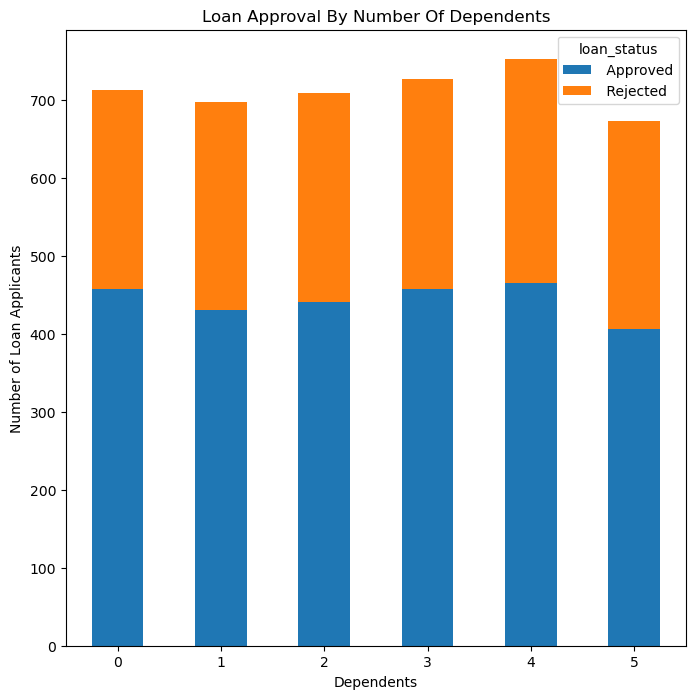

In [13]:
# Creating  a stacked bar chart 
pivot_df_count.plot(kind='bar',stacked=True,figsize=(8, 8))
plt.title('Loan Approval By Number Of Dependents')
plt.xlabel('Dependents')
plt.ylabel('Number of Loan Applicants')
plt.xticks(rotation=0)
plt.show()

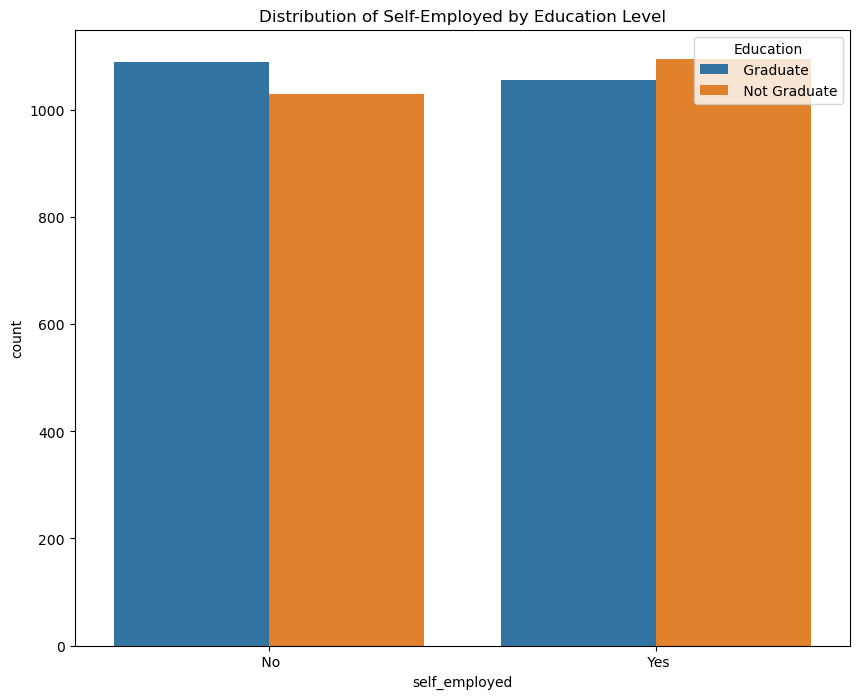

In [14]:
# Displaying distribution of Self-Employed by Education Level
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='self_employed', data=df, hue='education')
ax.set_title('Distribution of Self-Employed by Education Level')
ax.legend(title='Education', loc='upper right')
plt.show()

In [15]:
# Creating a pivot tanle pivot_df
pivot_df = df.pivot_table(index='education', columns='loan_status', aggfunc='size', fill_value=0)
pivot_df.head()

loan_status,Approved,Rejected
education,,
Graduate,1339,805
Not Graduate,1317,808


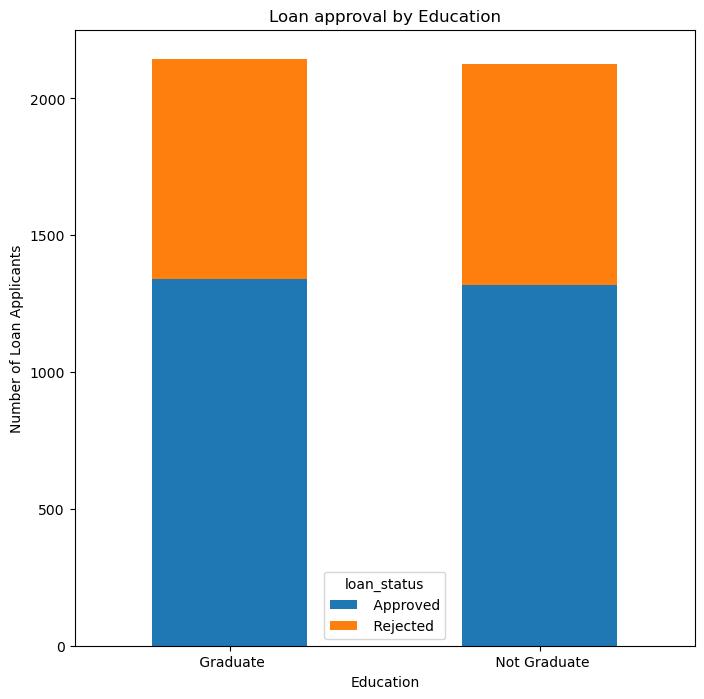

In [16]:
# Displaying the Loan Approval by Education 
pivot_df.plot(kind='bar',stacked=True,figsize=(8, 8))
plt.title('Loan approval by Education')
plt.xlabel('Education')
plt.ylabel('Number of Loan Applicants')
plt.xticks(rotation=0)
plt.show()

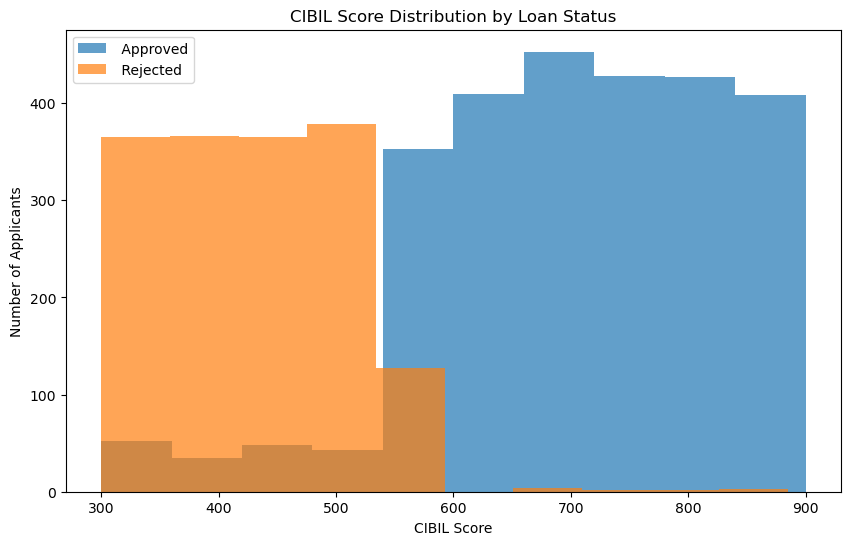

In [17]:
# Displaying the CIBIL Score distribution
plt.figure(figsize=(10,6))
for status in df['loan_status'].unique():
    subset = df[df['loan_status'] == status]['cibil_score']
    plt.hist(subset, alpha=0.7, label=status)

plt.title('CIBIL Score Distribution by Loan Status')
plt.xlabel('CIBIL Score')
plt.ylabel('Number of Applicants')
plt.legend()
plt.show()

/var/folders/41/ny9qd40j06x6p3w9bnl6nlcm0000gn/T/ipykernel_3570/1794187528.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = correlation_df.corr()


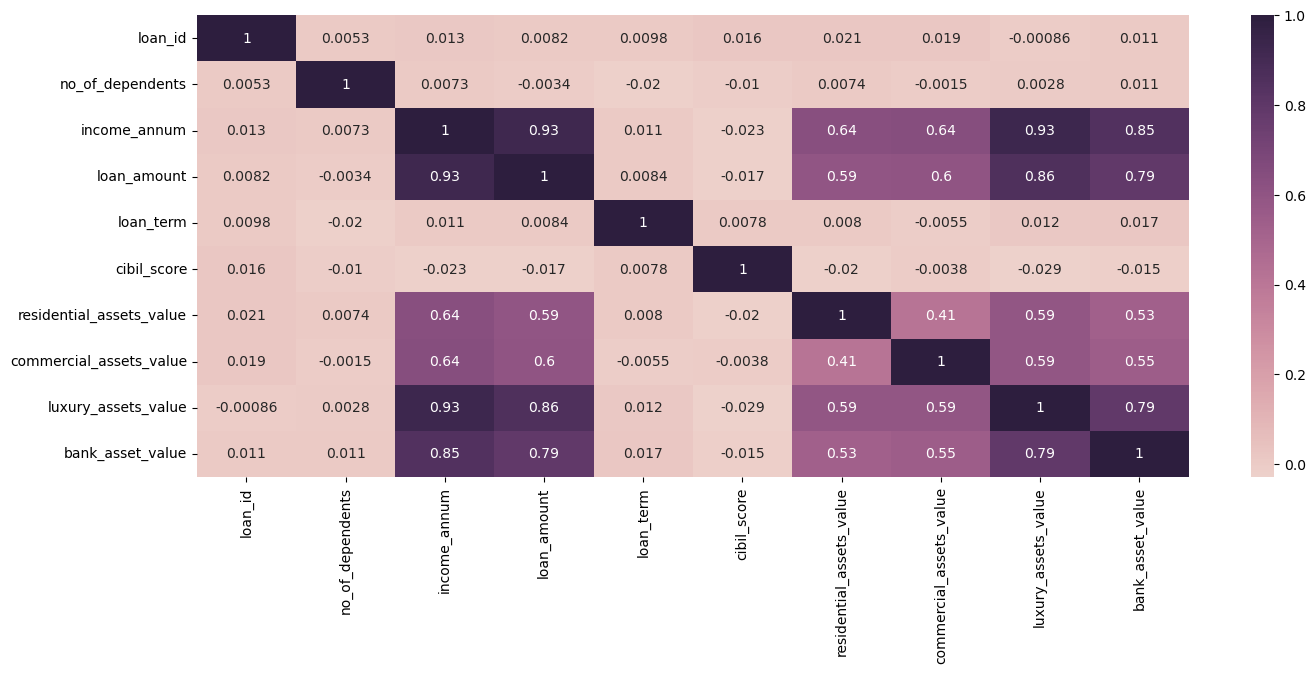

In [18]:
# Displaying the Correlation Matrix pre data preprocessing and cleaning
correlation_df = df
corr_df = correlation_df.corr()
plt.figure(figsize=(16, 6))
sns.heatmap(corr_df, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

# Data Preprocessing

In [19]:
# Dropping the column 'loan_id'
df = df.drop(['loan_id'], axis = 1)

In [20]:
# Creating seperate dataframe containing only numerical columns
columns = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
df_numerical = pd.DataFrame(df,columns=columns)

In [21]:
# Using built-in function to standarize the data
scaler = StandardScaler()
std_scalar = scaler.fit_transform(df_numerical)

In [22]:
# Determine the optimal number of components
cumulative_proportions = []
n_components_for_97_var = 0
for n in range(1, 10): 
    pca = PCA(n_components=n)
    pca.fit(std_scalar)  
    cumulative_proportion = np.cumsum(pca.explained_variance_ratio_)[-1]
    cumulative_proportions.append(cumulative_proportion)
    
    if cumulative_proportion >= 0.97:
        n_components_for_97_var = n
        break

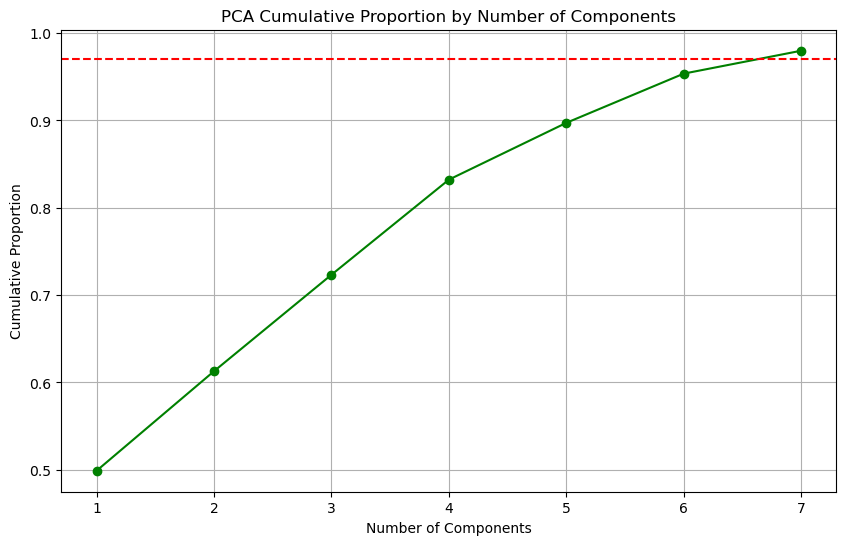

Number of components capturing over 97% variance: 7


In [23]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, n+1), cumulative_proportions, marker='o', linestyle='-', color='g')
plt.title('PCA Cumulative Proportion by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Proportion')
plt.grid(True)
plt.xticks(range(1, n+1))
plt.axhline(y=0.97, color='r', linestyle='--')
plt.show()

print(f"Number of components capturing over 97% variance: {n_components_for_97_var}")

In [24]:
# Apply PCA with 7 components
pca_optimal = PCA(n_components=7)
pca_optimal.fit(std_scalar)

PCA(n_components=7)

In [25]:
# Created a empty list to store the features to consider in the future
feature_importances = {}

for component in pca_optimal.components_:
    for i, loading in enumerate(component):
        feature_name = columns[i]
        
        abs_loading = abs(loading)
        
        if feature_name in feature_importances:
            feature_importances[feature_name] += abs_loading
        else:
            feature_importances[feature_name] = abs_loading

In [26]:
# Sorting the features
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

sorted_features

[('commercial_assets_value', 1.7945595831666976),
 ('residential_assets_value', 1.7661416700989312),
 ('loan_term', 1.7460571236334141),
 ('bank_asset_value', 1.6704041236805693),
 ('no_of_dependents', 1.6364068529044502),
 ('cibil_score', 1.4919605094177435),
 ('luxury_assets_value', 1.0579037626174959),
 ('loan_amount', 1.0430490090380717),
 ('income_annum', 0.8086599832946523)]

In [27]:
# Performing encoding: Converting Categorical Variable to Numerical Variable
ordinal_en = OrdinalEncoder()
df['education'] = ordinal_en.fit_transform(df['education'].values.reshape(-1,1))
df['self_employed'] = ordinal_en.fit_transform(df['self_employed'].values.reshape(-1,1))
df['loan_status'] = ordinal_en.fit_transform(df['loan_status'].values.reshape(-1,1))

In [28]:
# Combining Movable Assets
df['Movable_assets'] = df['bank_asset_value'] + df['luxury_assets_value']

# Combining Immovable Assets
df['Immovable_assets'] = df['residential_assets_value'] + df['commercial_assets_value']

In [29]:
# Drop columns
df.drop(columns=['bank_asset_value','luxury_assets_value', 'residential_assets_value', 'commercial_assets_value' ], inplace=True)

In [30]:
# Making another copy of the dataframe for the PCA
df_pca = df.copy()
# Drop columns
df_pca.drop(columns=['loan_amount','income_annum' ], inplace=True)

In [31]:
# Displaying first few lines of the dataset post data pre-processing and cleaning
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,0.0,0.0,9600000,29900000,12,778,0.0,30700000,20000000
1,0,1.0,1.0,4100000,12200000,8,417,1.0,12100000,4900000
2,3,0.0,0.0,9100000,29700000,20,506,1.0,46100000,11600000
3,3,0.0,0.0,8200000,30700000,8,467,1.0,31200000,21500000
4,5,1.0,1.0,9800000,24200000,20,382,1.0,34400000,20600000


In [32]:
# Displaying first few lines of the dataset post data pre-processing and cleaning with PCA
df_pca.head()

,no_of_dependents,education,self_employed,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,0.0,0.0,12,778,0.0,30700000,20000000
1,0,1.0,1.0,8,417,1.0,12100000,4900000
2,3,0.0,0.0,20,506,1.0,46100000,11600000
3,3,0.0,0.0,8,467,1.0,31200000,21500000
4,5,1.0,1.0,20,382,1.0,34400000,20600000


In [33]:
scattermatrix = df[['loan_term',
                    'cibil_score','loan_status',
                    'Movable_assets','Immovable_assets']]

In [34]:
scattermatrix.head()

,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,12,778,0.0,30700000,20000000
1,8,417,1.0,12100000,4900000
2,20,506,1.0,46100000,11600000
3,8,467,1.0,31200000,21500000
4,20,382,1.0,34400000,20600000


Text(0.5, 1.05, 'Scatter Matrix')

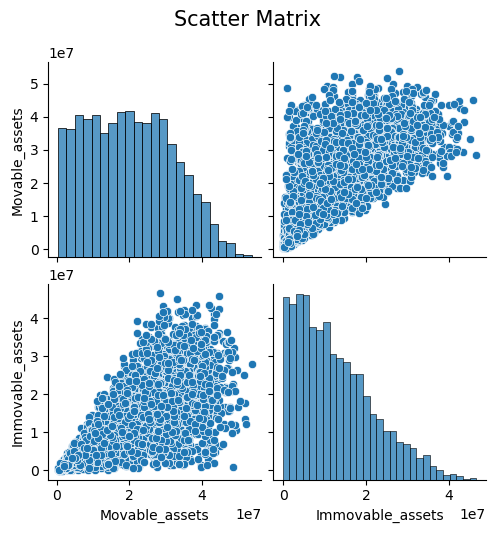

In [35]:
# Plotting a Scatter Matrix between the Movable and Immovable Assets
sns.pairplot(scattermatrix, vars=['Movable_assets', 'Immovable_assets'], kind='scatter')
plt.suptitle('Scatter Matrix',size=15,y=1.05)

# Data Partitioning

In [36]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Data Mining Models/Method

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [55]:
#Empty list to store the models performance
model_performance = []

In [56]:
# Function for model training
def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model

In [57]:
# Function to calculate performance metrics
def calculate_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['0', '1'], output_dict=True)
    validation_error = 1 - accuracy
    sensitivity = report['1']['recall'] if '1' in report else 0
    specificity = report['0']['recall'] if '0' in report else 0
    f1_score = report['1']['f1-score'] if '1' in report else 0
    metrics = {
        'Accuracy': accuracy,
        'Validation Error': validation_error,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'F1 Score': f1_score
    }
    return metrics

In [58]:
# Function to print confusion matrix
def print_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

In [59]:
# Function to plot ROC Curve
def plot_roc_curve(model, X_test, y_test):
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    else: # Use decision function for models that do not have predict_proba
        y_pred_prob = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [60]:
# Function to print Training Error and Test Error
def calculate_errors(model, X_train, y_train, X_test, y_test):
    # Training predictions
    train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_error = 1 - train_accuracy

    # Test predictions
    test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_error = 1 - test_accuracy
    
    return train_error, test_error

In [61]:
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Support Vector Machine', SVC(probability=True)),
    ('K-Nearest Neighbors', KNeighborsClassifier())
]

In [62]:
# Function to evaluate each of the models in scope
def evaluate_models(models, X_train, y_train, X_test, y_test):
    model_dict = {}  # Dictionary to store trained models
    for model_name, model in models:
        print(f'Now evaluating: {model_name}')
        trained_model = train_model(model, X_train, y_train)
        
        # Store the trained model in the dictionary
        model_dict[model_name] = trained_model

        # Calculate training and test errors
        train_error, test_error = calculate_errors(trained_model, X_train, y_train, X_test, y_test)
        print(f'Training Error: {train_error:.4f}')
        print(f'Test Error: {test_error:.4f}')
        
        # Store model performance data
        model_performance.append({
            'Model Name': model_name,
            'Training Error': train_error,
            'Test Error': test_error
        })

        # Other performance metrics and plots
        metrics = calculate_metrics(trained_model, X_test, y_test)
        for metric_name, metric_value in metrics.items():
            print(f'{metric_name}: {metric_value:.4f}')
        
        print('Confusion Matrix:')
        print_confusion_matrix(trained_model, X_test, y_test)

        print(f'ROC Curve for {model_name}:')
        plot_roc_curve(trained_model, X_test, y_test)

    return model_dict

Now evaluating: Random Forest
Training Error: 0.0000
Test Error: 0.0172
Accuracy: 0.9828
Validation Error: 0.0172
Sensitivity: 0.9639
Specificity: 0.9938
F1 Score: 0.9763
Confusion Matrix:
[[805   5]
 [ 17 454]]
ROC Curve for Random Forest:


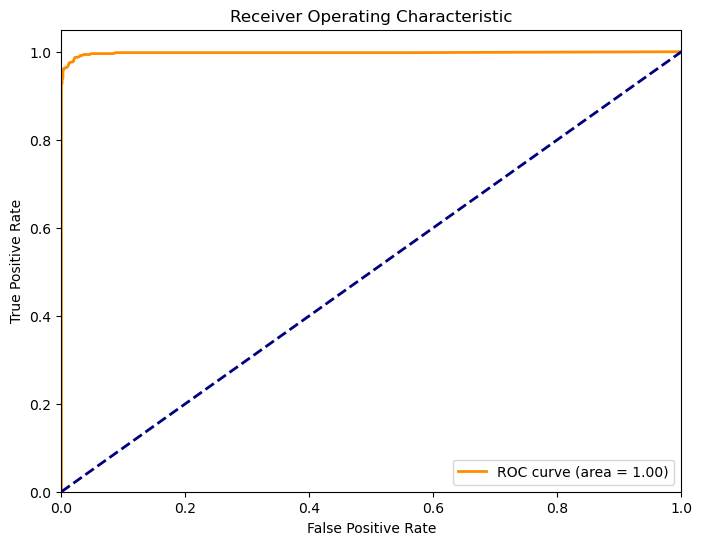

Now evaluating: Logistic Regression
Training Error: 0.2654
Test Error: 0.2732
Accuracy: 0.7268
Validation Error: 0.2732
Sensitivity: 0.3737
Specificity: 0.9321
F1 Score: 0.5014
Confusion Matrix:
[[755  55]
 [295 176]]
ROC Curve for Logistic Regression:


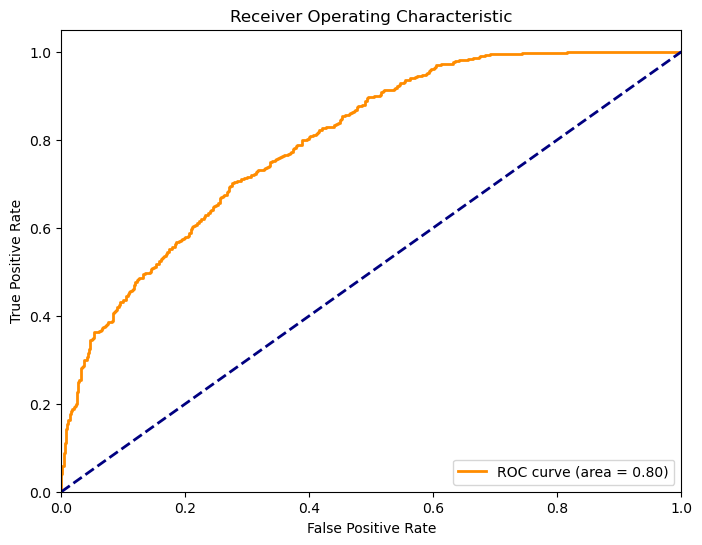

Now evaluating: Decision Tree
Training Error: 0.0000
Test Error: 0.0203
Accuracy: 0.9797
Validation Error: 0.0203
Sensitivity: 0.9660
Specificity: 0.9877
F1 Score: 0.9722
Confusion Matrix:
[[800  10]
 [ 16 455]]
ROC Curve for Decision Tree:


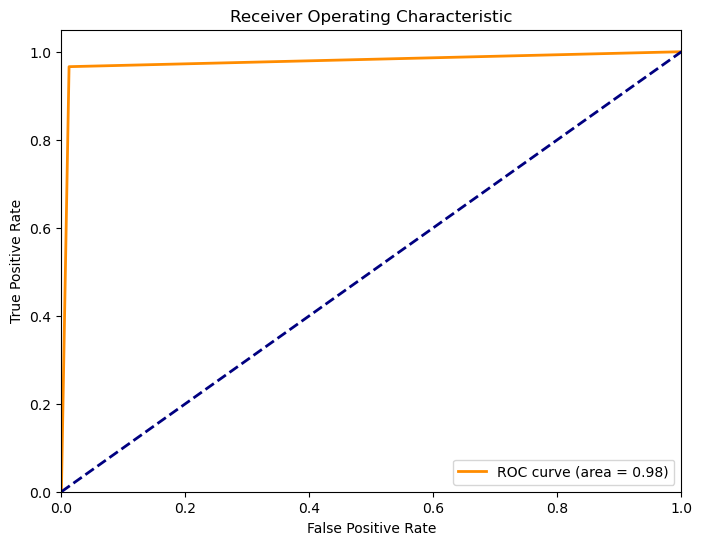

Now evaluating: Support Vector Machine
Training Error: 0.3822
Test Error: 0.3677
Accuracy: 0.6323
Validation Error: 0.3677
Sensitivity: 0.0000
Specificity: 1.0000
F1 Score: 0.0000
Confusion Matrix:


/Users/archie/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/archie/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/archie/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[810   0]
 [471   0]]
ROC Curve for Support Vector Machine:


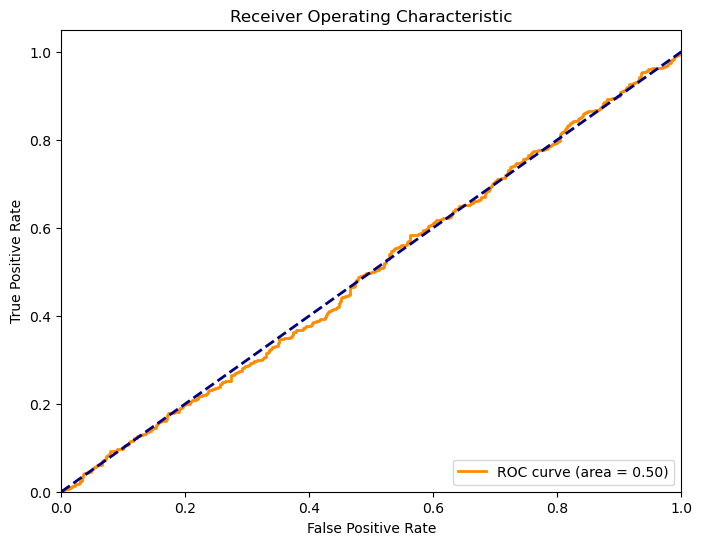

Now evaluating: K-Nearest Neighbors
Training Error: 0.2855
Test Error: 0.4278
Accuracy: 0.5722
Validation Error: 0.4278
Sensitivity: 0.2972
Specificity: 0.7321
F1 Score: 0.3382
Confusion Matrix:
[[593 217]
 [331 140]]
ROC Curve for K-Nearest Neighbors:


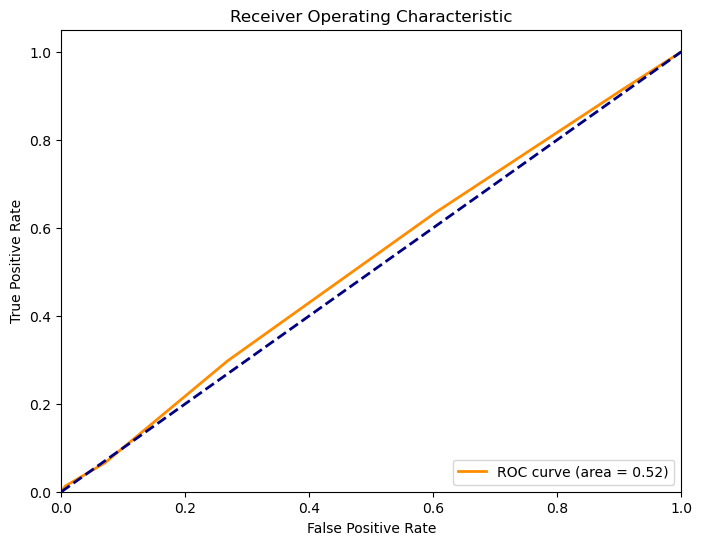

In [63]:
# Evaluating all models
trained_models = evaluate_models(models, X_train, y_train, X_test, y_test)

In [50]:
# Extract the Random Forest model
random_forest_model = trained_models['Random Forest']

In [51]:
# Get feature importance
importances = random_forest_model.feature_importances_

In [64]:
# Create a DataFrame to store feature names and their importance
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': random_forest_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [65]:
# Display the DataFrame
print("Feature Importances for Random Forest:")
print(feature_importances)

Feature Importances for Random Forest:
            Feature  Importance
6       cibil_score    0.834080
5         loan_term    0.060093
4       loan_amount    0.031787
8  Immovable_assets    0.020397
7    Movable_assets    0.020313
3      income_annum    0.020228
0  no_of_dependents    0.008443
1         education    0.002412
2     self_employed    0.002247


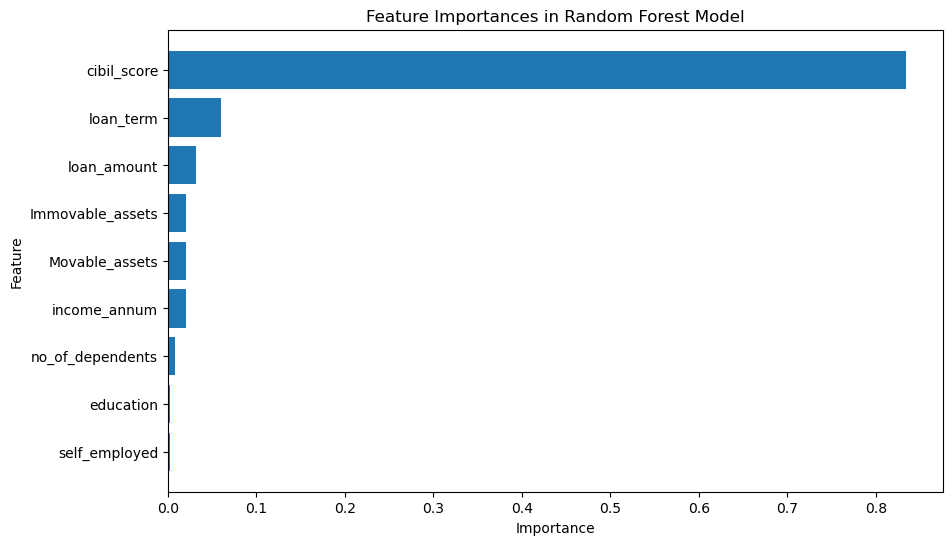

In [66]:
# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Model')
plt.show()

In [68]:
performance_df = pd.DataFrame(model_performance)
print("Model Performance:")
performance_df

Model Performance:


,Model Name,Training Error,Test Error
0,Random Forest,0.000000,0.017174
1,Logistic Regression,0.265395,0.273224
2,Decision Tree,0.000000,0.020297
3,Support Vector Machine,0.382195,0.367681
4,K-Nearest Neighbors,0.285475,0.427791
